# Preamble

In [1]:
import numpy as np
import pandas as pd
from tqdm import tqdm

from utils.my_units import *
from superrad import ultralight_boson as ub

In [2]:
import matplotlib.pyplot as plt
import matplotlib as mpl
plt.rcdefaults()
from matplotlib import font_manager
from matplotlib import rcParams
from matplotlib import rc
from matplotlib import colors
rcParams['mathtext.rm'] = 'Times New Roman' 
rcParams['text.usetex'] = True
rcParams['font.family'] = 'times' #'sans-serif'
font_manager.findfont('serif', rebuild_if_missing=True)
fontsize = 14
rcParams.update({'font.size':fontsize})

# Estimate Number of events

## Read in data files

In [3]:
### Read in data file with upper limits

df_triplets = pd.read_csv('data/Fake_pulsars_triplets.csv', index_col=0)
df_triplets = df_triplets[~np.isnan(df_triplets['upper limits'])]
df_triplets['type'] = 'triplet'
df_triplets

,NAME,RAJ,DECJ,PMRA,PMDEC,P0,P1,F0,F1,F2,...,R_LUM14,AGE,F_GW,h_max,suggested_pipeline,Tfft from err pos [day],outliers,upper limits,standard deviation UL,type
0,J1342+2822F,13:42:12,22:28:38,NaN,NaN,0.004400,NaN,227.272727,NaN,NaN,...,NaN,NaN,454.545454,8.010000e-25,NB,inf,no,2.750000e-26,6.200000e-28,triplet
1,J1803-3002B,18:03:34,-30:02:02,NaN,NaN,0.004397,NaN,227.427792,NaN,NaN,...,NaN,NaN,454.855584,1.060000e-24,NB,inf,no,2.770000e-26,6.190000e-28,triplet
2,J1823-3021E,18:23:39,-30:22:22,NaN,NaN,0.004394,NaN,227.583068,NaN,NaN,...,NaN,NaN,455.166136,1.030000e-24,NB,inf,no,2.770000e-26,6.560000e-28,triplet
6,J1624-39,16:24:25,-39:51:00,NaN,NaN,0.002960,NaN,337.837838,NaN,NaN,...,NaN,NaN,675.675676,3.110000e-24,NB,inf,no,2.980000e-26,7.310000e-28,triplet
7,J2045-68,20:45:17,-68:36:20,NaN,NaN,0.002960,NaN,337.837838,NaN,NaN,...,NaN,NaN,675.675676,6.420000e-24,NB,inf,no,3.300000e-26,7.290000e-28,triplet


In [4]:
df_doublets = pd.read_csv('data/Fake_pulsars_doublets.csv', index_col=0)
df_doublets = df_doublets[~np.isnan(df_doublets['upper_limits'])]
df_doublets.rename(columns={"upper_limits": "upper limits"}, inplace=True)
df_doublets['type'] = 'doublet'

In [5]:
df_fdots = pd.read_csv('data/Fake_pulsars_fdot.csv', index_col=0)
df_fdots = df_fdots[~np.isnan(df_fdots['upper limits'])]
df_fdots['type'] = 'fdot'

In [6]:
columns_to_use = ['NAME', 'RAJ', 'DECJ', 'F0', 'F1', 'F_GW', 'upper limits', 'type']
df_pulsars = pd.concat([df_triplets[columns_to_use], df_doublets[columns_to_use], df_fdots[columns_to_use]]) 
df_pulsars.sort_values(by='F_GW', inplace=True)
df_pulsars

,NAME,RAJ,DECJ,F0,F1,F_GW,upper limits,type
0.0,J1757-2745,17:57:55,-27:45:40,56.538013,4.170000e-17,113.076026,2.620000e-26,fdot
1.0,B1639+36A/J1641+3627A,16:41:41,NaN,96.362235,6.750000e-16,192.724470,2.380000e-26,fdot
3.0,J1910-5959B,19:10:52,-59:59:01,119.648733,1.130000e-14,239.297466,2.320000e-26,fdot
2.0,J1122-3546,11:22,-35:46:00,128.205128,NaN,256.410256,2.370000e-26,doublet
3.0,J1546-5925,15:46,-59:25:00,128.205128,NaN,256.410256,2.360000e-26,doublet
7.0,J1748-2446T,17:48:05,-24:46:45,141.145053,NaN,282.290106,2.500000e-26,doublet
5.0,J1748-2021C,17:48:51,-20:21:54,160.592710,1.540000e-15,321.185420,2.520000e-26,fdot
6.0,B0021-72C/J0024-7204C,0:23:50,-72:04:32,173.708219,1.500000e-15,347.416438,2.420000e-26,fdot
10.0,J1824-2452E,18:24:33,-24:52:11,184.501845,NaN,369.003690,2.520000e-26,doublet
7.0,J1911+0101B,19:11:13,NaN,185.724277,6.900000e-17,371.448554,2.730000e-26,fdot


## Functions

In [7]:
# Black hole mass distribution from 2003.03359
Mmin, Mmax = 5, 30
Norm = 0.740741*(Mmax**(1.35)-Mmin**(1.35))/( (Mmax*Mmin)**(1.35))

def dndM(m):
    return 1/Norm*1/m**(2.35)

In [9]:
### Function to compute the strain hTilde as a function of mass, spin, and age

def get_hTilde_grid(freq_GW, MList, aList, tSteps, RMW=20*kpc, tMW = 13.6*1E9*Year):

    hTilde = np.zeros((len(MList), len(aList), tSteps))
    tGrid = np.zeros((len(MList), len(aList), tSteps))

    mu = np.pi*freq_GW*Hz
    
    for i_m, mbh in enumerate(tqdm(MList)):
        alpha = GN*mu*mbh*MSolar

        for i_a, abh0 in enumerate(aList):
            try:
                wf = bc.make_waveform(mbh, abh0, alpha, units="physical+alpha")
                if wf.azimuthal_num()==1:
                    tauGW = wf.gw_time() 
                    tauSR = wf.cloud_growth_time() 

                    tTildeMin = tauGW*Second/tMW*1E-4
                    tTildeMax = 1-tauSR*Second/tMW    
                    tListTemp = np.concatenate([[0], np.geomspace(tTildeMin,tTildeMax,tSteps-1)])
                    tGrid[i_m, i_a, :] = tListTemp

                    hTilde[i_m, i_a, :] = wf.strain_char(tListTemp*tMW/Second, dObs=(RMW/Mpc) )

            except ValueError:
                pass 
            
    return hTilde, tGrid

In [10]:
def get_dfdlogh(hVal, hTilde, fMList):
    
    thFnc = np.heaviside((1-hTilde/hVal), np.zeros(hTilde.shape))
    integrand = (hTilde/hVal)**3*thFnc
    
    intOvert = np.trapz(integrand, x=tGrid, axis=2)
    intOvera = np.trapz(intOvert, x=aList, axis=1)
    res = 3*np.trapz(fMList*intOvera, x=MList)
    
    return res    

In [21]:
def get_dfdlogh_ip(hList, p_ind=0):
    hTilde, tGrid = get_hTilde_grid(df_pulsars['F_GW'].iloc[p_ind], MList, aList, tSteps, RMW, tMW ) # GW frequency must be in Hz    
    
    dfdlogh = np.zeros(hList.shape)
    fMList = dndM(MList)

    for i_h, hVal in enumerate(tqdm(hList)):    
        dfdlogh[i_h] = get_dfdlogh(hVal, hTilde, fMList)
        
    return dfdlogh

## Compute the differential number of events

In [11]:
# Grid of values of M, a and t
MList = np.geomspace(Mmin, Mmax, 100) 
aList = np.linspace(0, 1, 100)
tSteps = 500

# Parameters used for Galactic BH distribution
RMW=20*kpc; tMW = 13.6*1E9*Year

In [12]:
bc = ub.UltralightBoson(spin=1, model="relativistic") 

### Example for one frequency

In [13]:
p_ind = 0
hTilde, tGrid = get_hTilde_grid(df_pulsars['F_GW'].iloc[p_ind], MList, aList, tSteps, RMW, tMW ) # GW frequency must be in Hz

100%|██████████| 100/100 [02:04<00:00,  1.25s/it]


In [14]:
hList = np.geomspace(1E-27, 1E-24, 300)
dfdlogh = np.zeros(hList.shape)

fMList = dndM(MList)

for i_h, hVal in enumerate(tqdm(hList)):    

    dfdlogh[i_h] = get_dfdlogh(hVal, hTilde, fMList)

100%|██████████| 500/500 [00:57<00:00,  8.66it/s]


In [15]:
hUL = 2E-26

Ntot = 3000
selh = (hList > hUL)
Ntot*np.trapz(dfdlogh[selh]/hList[selh], x=hList[selh])

3.7010164709908415

In [17]:
dfdlogh

array([1.38793947e-01, 1.39828730e-01, 1.40714039e-01, 1.41847818e-01,
       1.42724281e-01, 1.43726511e-01, 1.44777558e-01, 1.45736809e-01,
       1.46927992e-01, 1.47715064e-01, 1.48866255e-01, 1.49722576e-01,
       1.50895692e-01, 1.51869176e-01, 1.53158704e-01, 1.54274055e-01,
       1.55495401e-01, 1.56752410e-01, 1.57865897e-01, 1.59203921e-01,
       1.60201604e-01, 1.61672560e-01, 1.62827412e-01, 1.64096970e-01,
       1.65547154e-01, 1.66895514e-01, 1.68379740e-01, 1.69744599e-01,
       1.71087478e-01, 1.72619670e-01, 1.73972536e-01, 1.75616298e-01,
       1.76991635e-01, 1.78579791e-01, 1.80134327e-01, 1.81624179e-01,
       1.83277205e-01, 1.84861635e-01, 1.86573723e-01, 1.88195326e-01,
       1.89901999e-01, 1.91635810e-01, 1.93395234e-01, 1.95070262e-01,
       1.96824664e-01, 1.98652102e-01, 2.00496853e-01, 2.02270395e-01,
       2.04212176e-01, 2.06025997e-01, 2.07929253e-01, 2.09955321e-01,
       2.11777240e-01, 2.13939144e-01, 2.15845117e-01, 2.17982622e-01,
      

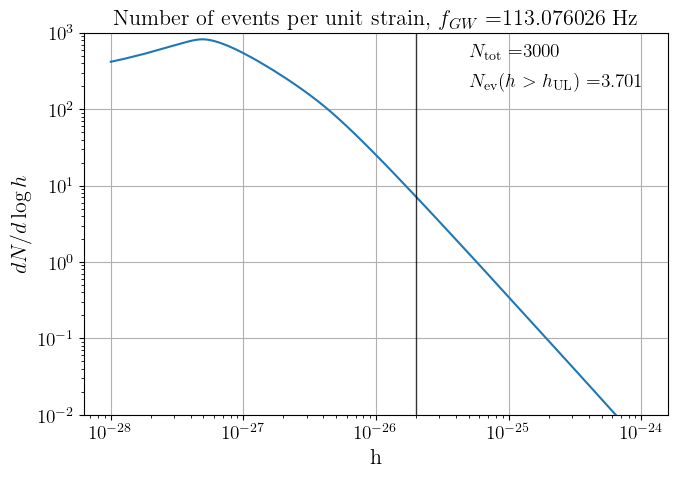

In [16]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7,5))
colorlist =  ['darkslateblue', 'darkred', 'orangered', 'green'] #['teal', 'orange', 'indianred']
liestyle_list = ['solid', 'dashed', 'dashdot']
font_s=16
hUL = 2E-26

Ntot = 3000

selh = (hList > hUL)
Nev = Ntot*np.trapz(dfdlogh[selh]/hList[selh], x=hList[selh])

ax.plot(hList, Ntot*dfdlogh)
ax.set_xscale('log'); ax.set_yscale('log')
ax.set_xlabel(r'h', fontsize=font_s); ax.set_ylabel(r'$dN/d\log h$', fontsize=font_s); 
ax.set_title('Number of events per unit strain, $f_{GW} = $'+str(df_pulsars['F_GW'].iloc[p_ind])+' Hz', fontsize=font_s);
ax.text(5E-26, 5E2, r'$N_{\mathrm{tot}} =$'+str(Ntot))
ax.text(5E-26, 2E2, r'$N_{\mathrm{ev}}(h > h_{\mathrm{UL}}) =$'+str(round(Nev, 3)))
ax.axvline(x=hUL, linewidth=1, c='k', alpha=0.8)
ax.set_ylim(0.01,1000)
ax.grid()

fig.tight_layout()
#fig.savefig('figs/dndlogh.pdf', bbox_inches="tight")

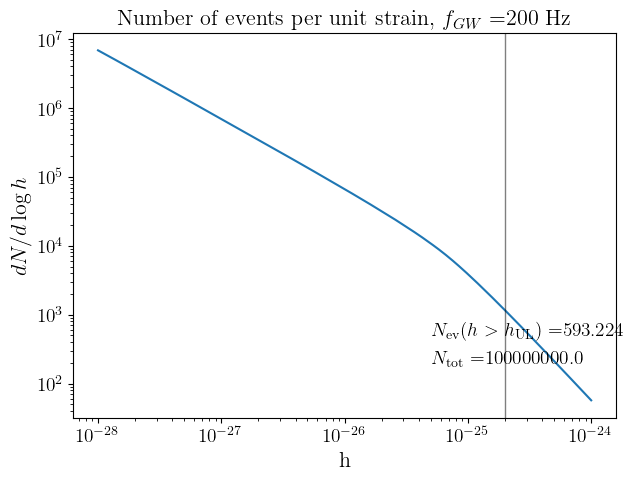

In [87]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7,5))
colorlist =  ['darkslateblue', 'darkred', 'orangered', 'green'] #['teal', 'orange', 'indianred']
liestyle_list = ['solid', 'dashed', 'dashdot']
font_s=16
hUL = 2E-25

Ntot = 1E8

selh = (hList > hUL)
Nev = Ntot*np.trapz(dfdlogh[selh]/hList[selh], x=hList[selh])

ax.plot(hList, Ntot*dfdlogh)
ax.set_xscale('log'); ax.set_yscale('log')
ax.set_xlabel(r'h', fontsize=font_s); ax.set_ylabel(r'$dN/d\log h$', fontsize=font_s); 
ax.set_title('Number of events per unit strain, $f_{GW} = $'+str(freq_GW)+' Hz', fontsize=font_s);
ax.text(5E-26, 5E2, r'$N_{\mathrm{ev}}(h > h_{\mathrm{UL}}) =$'+str(round(Nev, 3)))
ax.text(5E-26, 2E2, r'$N_{\mathrm{tot}} =$'+str(Ntot))
ax.axvline(x=hUL, linewidth=1, c='k', alpha=0.5)

In [88]:
hUL_list = np.geomspace(1E-27, 1E-24, 100)

Nev_List = np.zeros(len(hUL_list))
Ntot = 3000

for i, hUL in enumerate(hUL_list):
    selh = (hList > hUL)
    Nev_List[i] = Ntot*np.trapz(dfdlogh[selh]/hList[selh], x=hList[selh])

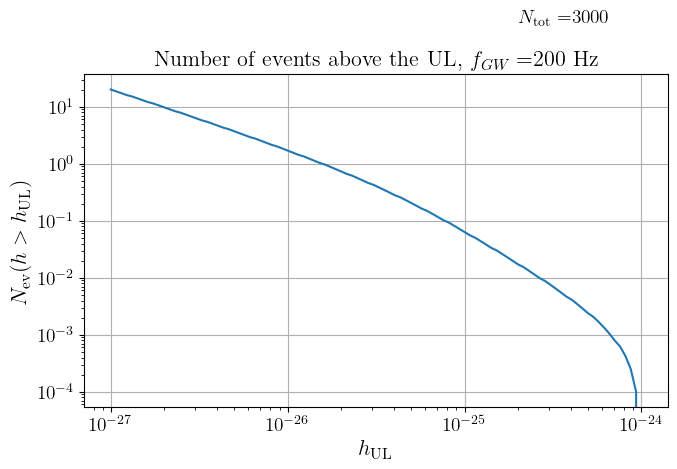

In [89]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7,5))
colorlist =  ['darkslateblue', 'darkred', 'orangered', 'green'] #['teal', 'orange', 'indianred']
liestyle_list = ['solid', 'dashed', 'dashdot']
font_s=16

#ax.plot(hUL_list, Nev_List, marker='.')
ax.plot(hUL_list, Nev_List)
ax.set_xscale('log'); ax.set_yscale('log')
ax.set_xlabel(r'$h_{\mathrm{UL}}$', fontsize=font_s); ax.set_ylabel(r'$N_{\mathrm{ev}}(h>h_{\mathrm{UL}})$', fontsize=font_s); 
ax.set_title('Number of events above the UL, $f_{GW} = $'+str(freq_GW)+' Hz', fontsize=font_s);
ax.text(2E-25, 3E2, r'$N_{\mathrm{tot}} =$'+str(Ntot))
#ax.text(5E-26, 2E2, r'$N_{\mathrm{ev}}(h > h_{\mathrm{UL}}) =$'+str(round(Nev, 3)))
#ax.axvline(x=hUL, linewidth=1, c='k', alpha=0.5)
#ax.set_ylim(0.1,2000)
ax.grid()

fig.tight_layout()
fig.savefig('figs/NaboveUL.pdf', bbox_inches="tight")

### Result for multiple pulsars

In [23]:
np.arange(5)

array([0, 1, 2, 3, 4])

In [24]:
ipList = np.arange(5)
hList = np.geomspace(1E-27, 1E-24, 300)
dfdlogh_ip = np.zeros((len(ipList), len(hList)))

for ip in ipList:
    dfdlogh_ip[ip] = get_dfdlogh_ip(hList, p_ind=ip)

100%|██████████| 300/300 [00:32<00:00,  9.10it/s]


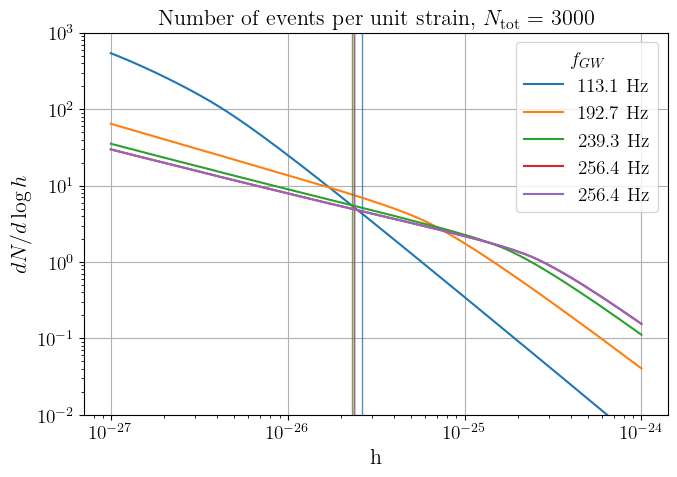

In [63]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7,5))
colorlist =  ['darkslateblue', 'darkred', 'orangered', 'green', 'teal'] #['teal', 'orange', 'indianred']
liestyle_list = ['solid', 'dashed', 'dashdot']
font_s=16

Ntot = 3000

#selh = (hList > hUL)
#Nev = Ntot*np.trapz(dfdlogh[selh]/hList[selh], x=hList[selh])

for ip in ipList:
    line,=ax.plot(hList, Ntot*dfdlogh_ip[ip], label=str(round(df_pulsars['F_GW'].iloc[ip], 1))+' Hz')
    ax.axvline(x=df_pulsars['upper limits'].iloc[ip], linewidth=1, alpha=0.8, c=line.get_color())

ax.set_xscale('log'); ax.set_yscale('log')
ax.set_xlabel(r'h', fontsize=font_s); ax.set_ylabel(r'$dN/d\log h$', fontsize=font_s); 
ax.set_title('Number of events per unit strain, $N_{\mathrm{tot}} =$ '+str(Ntot), fontsize=font_s);
ax.legend(title='$f_{GW}$')
ax.set_ylim(0.01,1000)
ax.grid()

fig.tight_layout()
fig.savefig('figs/dndlogh_pulsars.pdf', bbox_inches="tight")

In [46]:
Nev_above_th = np.zeros((len(ipList), 2))
Ntot = 3000

for ip in ipList:
    hUL = df_pulsars['upper limits'].iloc[ip]
    Nev_above_th[ip, 0] = df_pulsars['F_GW'].iloc[ip]
    
    selh = (hList > hUL)
    Nev_above_th[ip, 1] = Ntot*np.trapz(dfdlogh_ip[ip][selh]/hList[selh], x=hList[selh])

In [47]:
Nev_above_th

array([[113.076026  ,   2.24134932],
       [192.72447   ,   7.15909379],
       [239.297466  ,   7.29607017],
       [256.410256  ,   6.95778353],
       [256.410256  ,   7.07009928]])

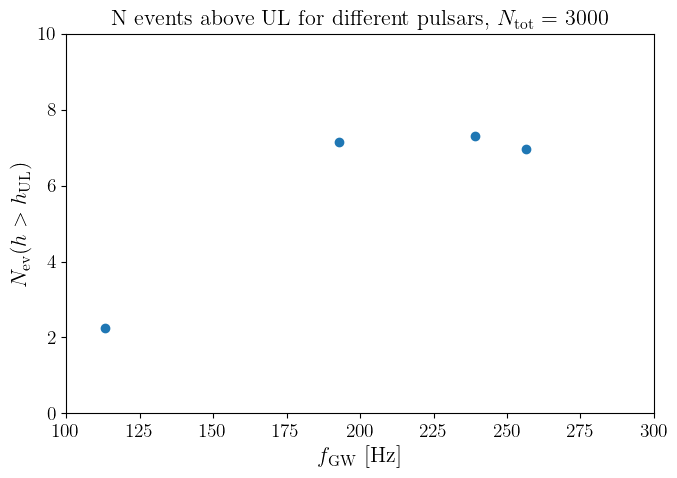

In [62]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7,5))
colorlist =  ['darkslateblue', 'darkred', 'orangered', 'green'] #['teal', 'orange', 'indianred']
liestyle_list = ['solid', 'dashed', 'dashdot']
font_s=16

ax.plot(Nev_above_th[:4, 0], Nev_above_th[:4, 1], 's', marker='o')

ax.set_title('N events above UL for different pulsars, $N_{\mathrm{tot}} =$ '+str(Ntot),fontsize=font_s);
ax.set_xlabel(r'$f_{\mathrm{GW}}$ [Hz]', fontsize=font_s); ax.set_ylabel(r'$N_{\mathrm{ev}}(h>h_{\mathrm{UL}})$', fontsize=font_s); 
#ax.grid()
ax.set_xlim(100,300); ax.set_ylim(0,10)

fig.tight_layout()
fig.savefig('figs/Nexpected.pdf', bbox_inches="tight")

## Plots

Normalization =  1.0002145481580622


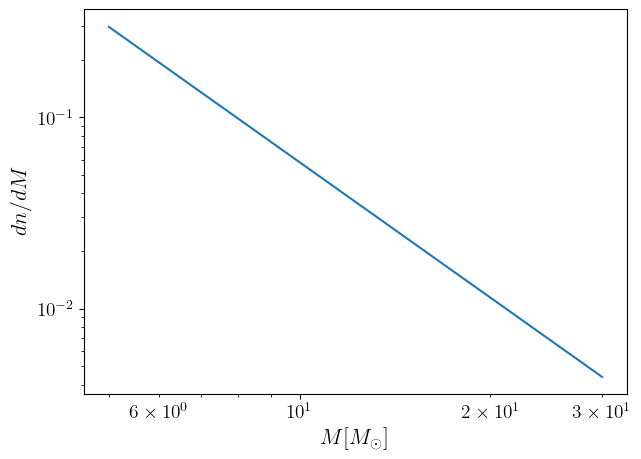

In [8]:
### BH mass distributon

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7,5))
font_s=16

MList = np.geomspace(Mmin, Mmax, 100) #np.arange(Mmin, Mmax, 0.2)
print('Normalization = ', str(np.trapz(dndM(MList), x=MList)))

ax.plot(MList, dndM(MList))
ax.set_xscale('log'); ax.set_yscale('log')
ax.set_xlabel(r'$M [M_{\odot}]$', fontsize=font_s)
ax.set_ylabel(r'$dn/dM$', fontsize=font_s);

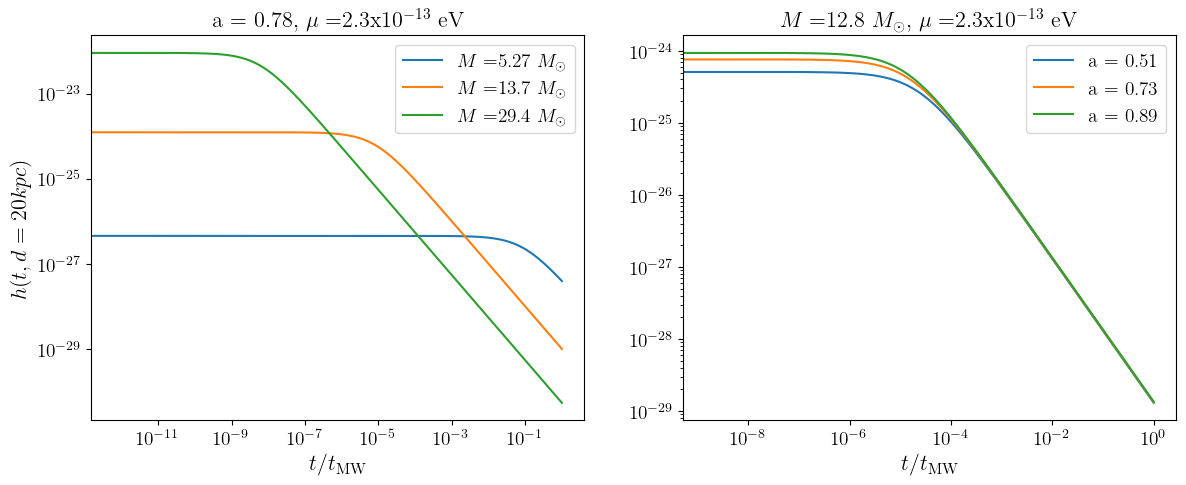

In [27]:
### Check the computed strains hTilde for a few valaues of M and a

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14,5))
colorlist =  ['darkslateblue', 'darkred', 'orangered', 'green'] #['teal', 'orange', 'indianred']
liestyle_list = ['solid', 'dashed', 'dashdot']
font_s=16
sub_im = np.array([3, 56, 98])
i_a = 78

mu = np.pi*df_pulsars['F_GW'].iloc[p_ind]*Hz

for i in sub_im:
    ax[0].plot(tGrid[i, i_a, :], hTilde[i, i_a, :], label=r'$M = $'+str(MList[i])[:4]+'$\ M_{\odot}$')
    
i_m = 52
sub_ia = np.array([51, 73, 89])

for i in sub_ia:
    ax[1].plot(tGrid[i_m, i, :], hTilde[i_m, i, :], label=r'a = '+str(aList[i])[:4])

ax[0].set_title(r'a = '+str(aList[i_a])[:4]+', $\mu = $'+str(mu/eV/1e-13)[:3]+'x$10^{-13}$ eV', fontsize=font_s);
ax[1].set_title(r'$M = $'+str(MList[i_m])[:4]+'$\ M_{\odot}$, $\mu = $'+str(mu/eV/1e-13)[:3]+'x$10^{-13}$ eV', fontsize=font_s);

for i in range(2):
    ax[i].set_xscale('log'); ax[i].set_yscale('log')
    ax[i].set_xlabel(r'$t/t_{\mathrm{MW}}$', fontsize=font_s)
    ax[0].set_ylabel(r'$h(t, d=20 kpc)$', fontsize=font_s);
    ax[i].legend()

# Tests

In [3]:
bc = ub.UltralightBoson(spin=1, model="relativistic") 

In [4]:
mbh = 10
abh0 = 0.5
alpha = 0.02

wf = bc.make_waveform(mbh, abh0, alpha, units="physical+alpha")

if wf.azimuthal_num()==1:
    tauGW = wf.gw_time()*Second

In [5]:
tauSR = wf.cloud_growth_time()
tauGW = wf.gw_time()
tauSR/1E9, tauGW/1e13

(4.345572030927802, 2.84590924589311)

In [6]:
wf.strain_char(-10, dObs=0.001) # distance in Mpc

4.5728003476743694e-24

In [7]:
wf.strain_char(-1E9, dObs=0.001)

6.532471187190322e-42

In [8]:
tList = np.geomspace(1E-5,1E7,100)*tauGW #np.concatenate([ np.sort(np.logspace(-9,0,50)*(-tauSR)), np.logspace(-13, 2, 200)*tauGW ] )  
hList = wf.strain_char(tList, dObs=0.001)

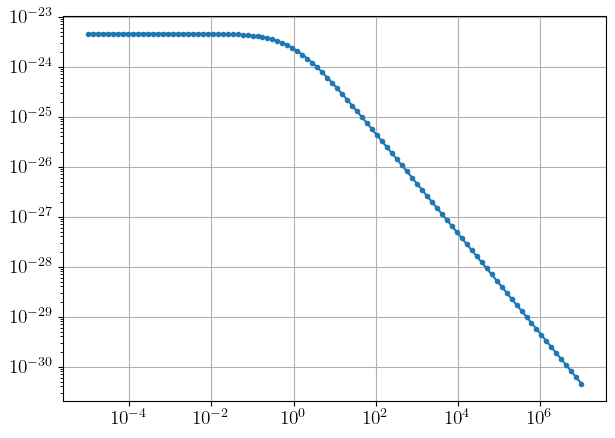

In [10]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7,5))
colorlist =  ['darkslateblue', 'darkred', 'orangered', 'green'] #['teal', 'orange', 'indianred']
liestyle_list = ['solid', 'dashed', 'dashdot']

#ax.plot((tList+tauSR)[1:], hList[1:])
ax.plot(tList/tauGW, hList, marker='.')
ax.set_xscale('log'); ax.set_yscale('log')
ax.grid()

In [10]:
def get_dfdlogh_diff(hVal, hTilde, fMList):
    
    thFnc = np.heaviside((hVal/hTilde-1), np.zeros(hTilde.shape))
    integrand = 3*( (hTilde/hVal) )**3*thFnc*fMList[:,None,None]
    
    return integrand

In [15]:
hList = np.geomspace(1E-28, 1E-24, 100)

hList_Grid = np.full((len(hList),len(MList), len(aList), tSteps), hList[:, np.newaxis, np.newaxis, np.newaxis])

hTilde_Gridh = np.full((len(hList),len(MList), len(aList), tSteps), hTilde[np.newaxis, :, :, :])
print(hList_Grid.shape, hTilde_Gridh.shape)

(100, 100, 100, 500) (100, 100, 100, 500)


In [16]:
fMList = dndM(MList)
fMList.shape

(100,)

In [17]:
thFnc = np.heaviside((1-hTilde_Gridh/hList_Grid), np.zeros(hTilde_Gridh.shape))

In [ ]:
thFnc.shape